# Logistic Regression

The purpose of this is to review Python syntax by fitting
a logistic regression over simulated data.

In [10]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

#### Data Generating Process

In [11]:
def inverse_logit(x):
    return(1 / (1 + np.exp(-x)))

In [12]:
np.random.seed(123)
X1 = np.random.normal(1,3,size=1000)
X2 = np.random.normal(-3,1,size=1000)
Z = 3 + 5*X1 - 2 * X2
probs = inverse_logit(Z)
y = np.random.binomial(size=1000,n=1,p=probs)

In [13]:
# Create pandas dataframe
df = pd.DataFrame(
    {'X1': X1,
     'X2': X2,
     'y': y        
    }
)

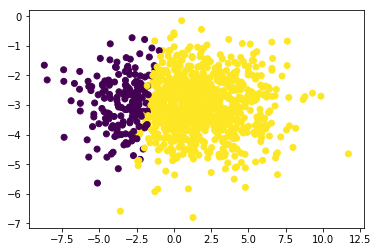

In [215]:
plt.scatter(X1,X2,c=y)
plt.show()

#### Scikit Learn

In [219]:
lr = LogisticRegression(random_state=0, solver='lbfgs')

In [220]:
model = lr.fit(df[['X1','X2']],df['y'])

In [221]:
print(model.intercept_)
print(model.coef_)

[ 3.05626445]
[[ 4.03993989 -1.46340723]]


#### From Scratch

Likelihood Function:

$L(\beta_0,\beta) = \prod_{i=1}^{n} p(x_i)^{y_i}(1-p(x_i))^{1-y_i}$  

Log-likelihood Function:

$l(\beta_0,\beta) = \sum_{i=1}^{n} y_i\log{p(x_i)} + (1-y_i)\log{(1-p(x_i))}$

Derivative of log-likelihood with respect to $\beta$

$\frac{\partial l}{\partial \beta_j} = \sum_{i=1}^{n}(y_i-p(x;\beta_0,\beta))x_{ij}$

Hessian Matrix (second derivative:

$H = XWX^T$

So need to solve:

$\Delta_k = (X^TW_kX)^{-1}X^T(y-p_k)$

Newton's Method for Numerical Optimization

$x_{n+1} = x_n - \Delta_k$



In [244]:
constant = np.repeat(1,1000)
X = np.vstack((constant,X1,X2)).T

In [245]:
beta = np.array([0,0,0])

In [246]:
delta=np.array([1,1,1])

In [249]:
i = 1
while delta.max() > 0.000001:
    i += 1
    probs = np.exp(np.dot(X,beta)) / (1 + np.exp(np.dot(X,beta)))
    W = np.diag(probs * (1-probs))
    delta = np.dot(inv(np.dot(np.dot(X.T,W),X)) , np.dot(X.T,(y-probs)))
    beta = beta + delta
    if i == 10000:
        break

In [250]:
beta

array([ 3.88970889,  5.98588497, -2.33791935])